---

# **TC4033**

# **Visión computacional para imágenes y video**

## **2.2 Google Colab - Simple ImgProcessing**

### **Equipo 30:**

* Julio Baltazar Colín: A01794476
* Julio Osvaldo Hernández Bucio: A01794366
* Helmy Andrea Moreno Navarro: A01793918
* Maricel Parra Osorio - A01793932
* Yeison Fernando Villamil Franco: A01793803

---

**Los ejercicios que deben agregarse a este proyecto serán las siguientes:**

1. Las transformaciones pixel a pixel son sumamente utilizadas para aumentar la cantidad de imágenes para entrenar modelos de inteligencia artificial, sobre todo aquellas de tipo fotométrico. Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Collab sobre imágenes propias.
2. Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.
3. Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.
4. Investiga una aplicación donde se puede usar la sustracción de imágenes e integra el código en en una fila de google collab, justificar brevemente tu investigación, haciendo una demo sencilla.

# **Solución**

**`1. Las transformaciones pixel a pixel son sumamente utilizadas para aumentar la cantidad de imágenes para entrenar modelos de inteligencia artificial, sobre todo aquellas de tipo fotométrico. Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Collab sobre imágenes propias.`**

In [2]:
from PIL import Image, ImageOps
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

A continuación se carga una imagen real la cual fue creada usando modelos de inteligencia artificial o los famosos Large vision models

<class 'numpy.ndarray'>


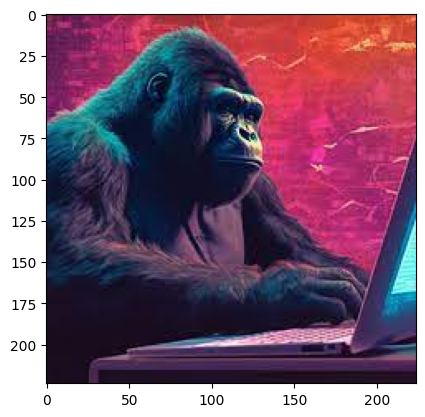

In [4]:
img = mpimg.imread('/home/yvillamil/Pictures/Gorila.jpeg')
plt.imshow(img)
print(type(img))

#### **Contrast Stretching**

Este método amplía el rango de intensidades, aumentando el rango dinámico de los niveles de gris en la imagen. Las imágenes de bajo contraste debido a una iluminación inadecuada se pueden mejorar con este método, aumentando así el contraste general.

In [6]:
def Contrast_stretch(p, r1, s1, r2, s2):
    if (0 <= p and p <= r1):
        equation = (s1 / r1)*p
    elif (r1 < p and p <= r2):
        equation = ((s2 - s1)/(r2 - r1))*(p - r1)+s1
    else:
        equation = ((255 - s2)/(255 - r2))*(p - r2)+s2
    return equation
  
# Initialize range
r1 = 55
s1 = 40
r2 = 140
s2 = 200
  

pixelVal_vec = np.vectorize(Contrast_stretch)
  
# Contrast stretching
contrast = pixelVal_vec(img, r1, s1, r2, s2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


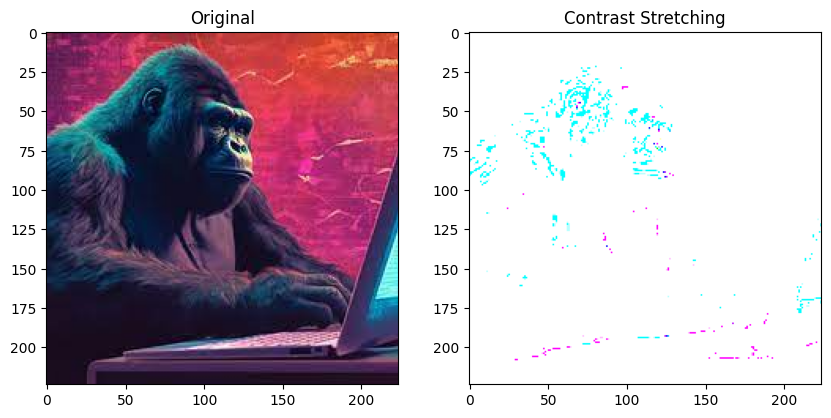

In [7]:
fig = plt.figure(figsize=(10, 10))

# Subplot for original image
a=fig.add_subplot(121)
imgplot = plt.imshow(img)
a.set_title('Original')

a = fig.add_subplot(122)
imgplot = plt.imshow(contrast)
a.set_title('Contrast Stretching')

plt.show()

#### **Gray-level Slicing**

Se centra en mejorar un rango específico de niveles de grises en una imagen. Los intervalos están predefinidos y se manipulan los píxeles que se encuentran en ese rango. Esto se puede utilizar para iluminar el rango deseado de niveles de grises y al mismo tiempo preservar la calidad del fondo en el rango.

In [8]:
#  Find width and height of image
img_test = img[:, :, 0]
row, column = img_test.shape

#  Create an zeros array to store the sliced image
img1 = np.zeros((row,column),dtype = 'uint8')

#  Specify the min and max range
min_range = 80
max_range = 140

In [9]:
# Recorra la imagen de entrada y, si el valor de píxel se encuentra en el rango deseado, establecer un valor de 255
# de lo contrario, configúrelo al valor deseado
for i in range(row):
    for j in range(column):
        if img_test[i,j] > min_range and img_test[i,j] < max_range: 
            img1[i,j] = 255
        else: 
            img1[i,j] = img_test[i-1,j-1] 

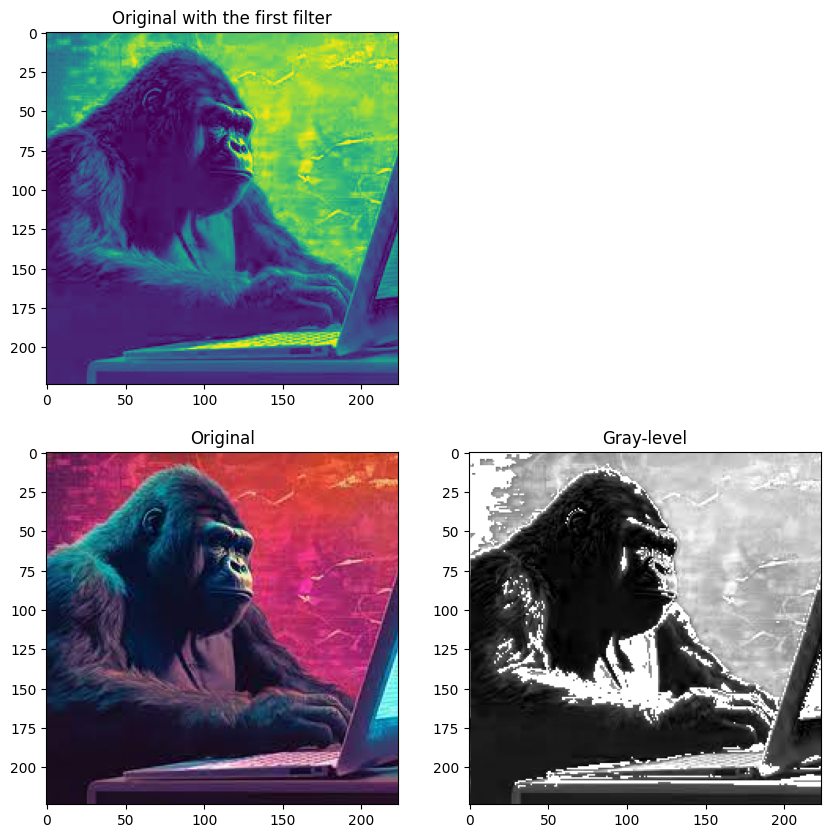

In [10]:
fig = plt.figure(figsize=(10, 20))

# Subplot for original image
a=fig.add_subplot(121)
imgplot = plt.imshow(img)
a.set_title('Original')

a = fig.add_subplot(122)
imgplot = plt.imshow(img1, cmap="gray")
a.set_title('Gray-level')

a = fig.add_subplot(221)
imgplot = plt.imshow(img_test)
a.set_title('Original with the first filter')

plt.show()

#### **Intensity level slicing**

El método, llamado corte por niveles de intensidad, se puede implementar de varias maneras, pero la mayoría son variaciones de dos temas básicos. Un enfoque es mostrar en un valor (digamos, blanco) todos los valores en el rango de interés y en otro (digamos, negro) todas las demás intensidades.

In [11]:
img1 = img/2
img2 = 2 * img
img3 = img**2

dict_images = {'Halve the intensity':img1, 'Double the intensity':img2, 'Square function':img3}

In [34]:
def display(dict=None, nrow=None, ncol=None):
    
    fig = plt.figure(figsize=(10, 10))
    
    for raw, col in enumerate(dict):
        
        plt.subplot(nrow,ncol,raw+1)
        plt.title(f'Transformacion: {col}')
        plt.imshow(dict[col])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


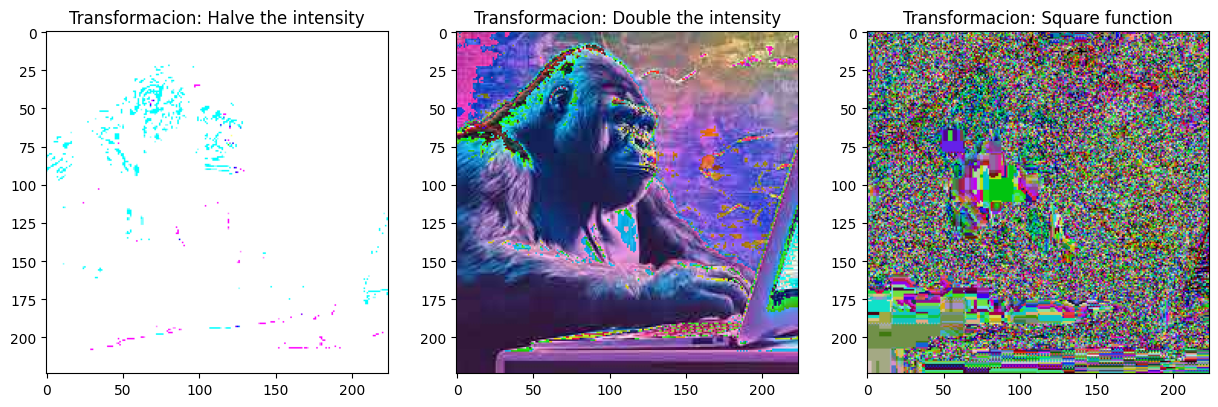

In [22]:
display(dict_images, nrow=1, ncol=3)

#### **Masking, thresholding**
Pruebas binarias para enmascar imágenes usando un umbral respectivo

In [24]:
img4 = img.copy()
img4[img4 < 150] = 0

<class 'numpy.ndarray'>


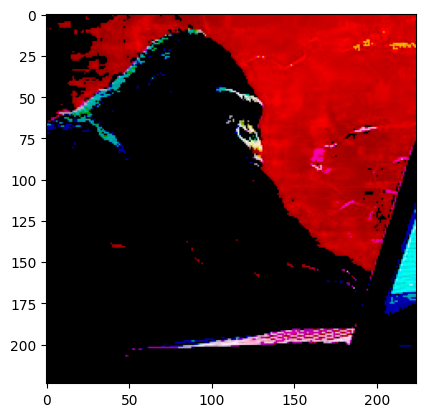

In [25]:
plt.imshow(img4)
print(type(img4))

**`2. Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla..`**

### **Negative**

In [36]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.imread('/home/yvillamil/Pictures/Gorila.jpeg', 0)

# Max intensity based on quantization
max_pixel = img1.max()

colored_negative = max_pixel-img
gray_negative = max_pixel-img_gray

dict_negative = {
    'original':img,
    'colored_negative': colored_negative,
    'gray': img_gray,
    'gray_negative': gray_negative  
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


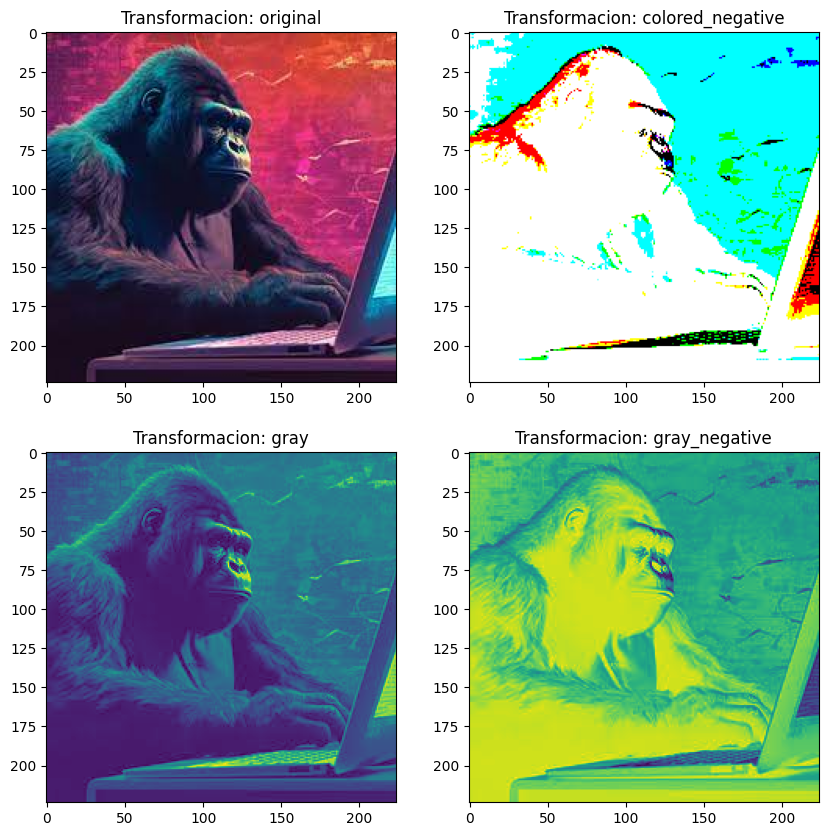

In [37]:
display(dict_negative, nrow=2, ncol=2)

**`3. Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.`**


### **Power low transformation**

$$
S = c * r^γ
$$

También conocida como correlación gamma, se ocupa de los niveles gamma (γ) en las imágenes, ampliamente utilizada para mejorar el contraste. La ecuación de transformación es como se muestra a continuación.

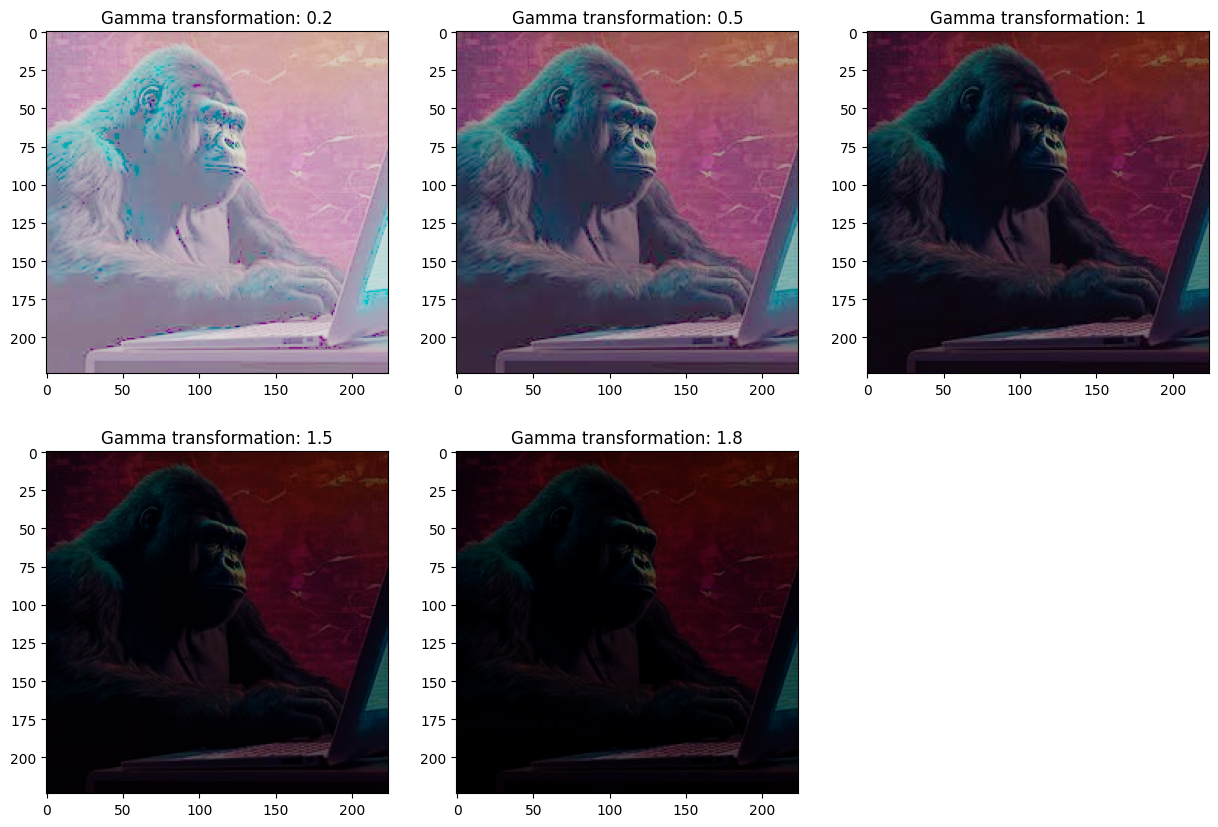

In [229]:
fig = plt.figure(figsize=(15, 10))
rows = 2
for raw, gamma in enumerate([0.2, 0.5, 1, 1.5, 1.8]):

    # Apply gamma correction.
    gamma_transformation = np.array(255*(img1 / 255) ** gamma, dtype = 'uint8')
    
    plt.subplot(rows,3,raw+1)
    plt.title(f'Gamma transformation: {gamma}')
    plt.imshow(gamma_transformation)



**`4. Investiga una aplicación donde se puede usar la sustracción de imágenes e integra el código en en una fila de google collab, justificar brevemente tu investigación, haciendo una demo sencilla.`**

Adicional a la substracción, se presentarán una serie de operaciones aritméticas que pueden ser realizadas con OpenCV

#### **Sustraction**

A continuación se muestra como sustraer los valores de la imagen original y una imagen que fue generada en el paso de operaciones de intensidad (específicamente el doble de la intensidad) 

In [197]:
img_sub = cv2.subtract(img, img2)

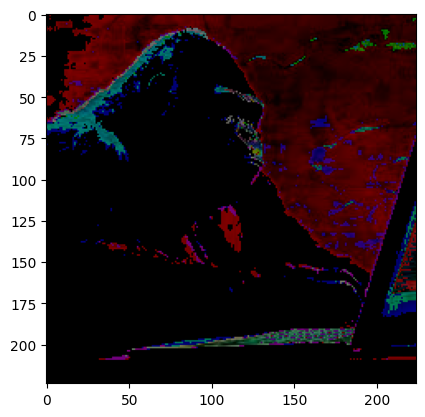

In [198]:
plt.imshow(img_sub)

#### **Power low**

Usando openCV es posible crear funciones del tipo transformaciones a la potencia para la imagen original

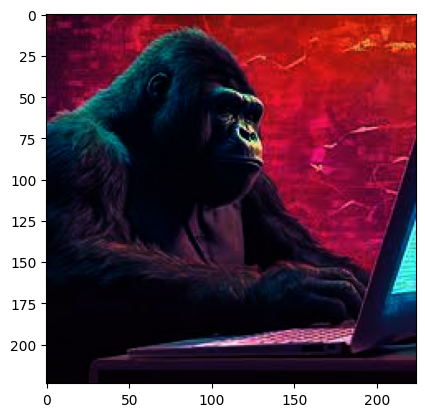

In [240]:
img_plot = img.copy()
pow_law = np.array(cv2.pow((img_plot / img_plot.max()), 1.8) * img_plot.max(), dtype='uint8')
plt.imshow(pow_law)

#### **Addition**

Es adicionado un valor a cada pixel mediante sumatoria. Se observan los cambios de color de la imagen original

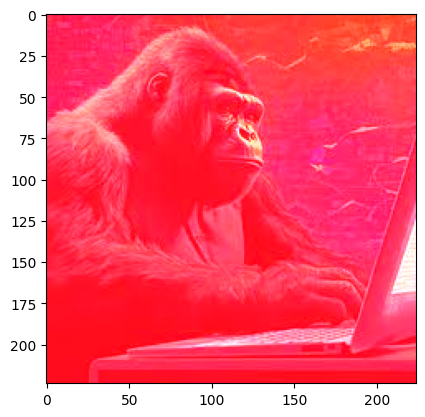

In [244]:
img_sub = cv2.add(img, 252)
plt.imshow(img_sub)

#### **Multiply**

Calcula el producto escalado por elemento de dos matrices o una matriz con un escalar

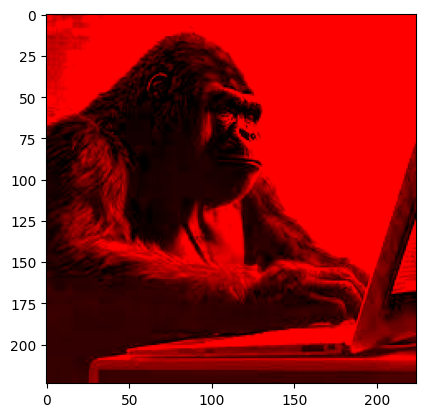

In [273]:
i = cv2.multiply(img, 1, dtype=-1, scale=2)
plt.imshow(np.array(i, dtype='uint8'))

## **Conclusiones**

* Se han implementando tres operaciones básicas de punto (point operations), las cuales permiten realizar cambios directos en los valores de pixeles, permitiendo la transformación de las imagenes. Las usadas y expuestas en código son las siguientes:
    * Contrast Stretching: Permite cambios de intensidad altas en las imágenes en escala de grises. En la imagen que vemos representada se observa que el color de la transformación es muy diferente al original a lo esperado en los ejemplo pero esto es debido a la iluminación de la imagen.
    * Gray-level: De manera sencilla se pueden observas las escalas de grises de la imagen original y se expone una imagen de un solo canal (siempre el primero) y su escala es grises.
    * Nivel de intesidades: Por medio de operaciones sencillas es posible cambiar las intensidades de imágenes, tales como el doble de los pixeles o la raíz cuadrada. Siendo esta última la que genera cambios que se evidencian de manera significativa en la figura que lo representa.
* El negativo tiene una forma sencilla se extraerse y es por medio del valor máximo de pixeles y restando cada uno de estos con este valor. Para dar más valor se muestra el negativo a color y en escala de grises sombras que en el caso de escala de grises no es posible identificar a grandes rasgos y en su negativo da más brillo y de igual manera, para el caso coloridad se muestra que aquellas que son más brillantes de la imagen original esta tiende a ser más oscura en su negativo. Transformación interesante que puede ser de valor en proceso de desarrollos analíticos específicos.
* Para la transformación `power law` se considera de manera sencilla usar una operación de arrays para poder calcular lo más conocido como correlación gamma. Esta permite ver los cambios de contraste de la imagen original, haciendola más intensa cuando el valor del exponente es mayor.
* Finalmente y mediante el uso de openCV, se emplean funciones propias de la librería o solo para realizar una sustracción de pixeles, aquí también son presentando ejemplos para potencias, multiplicación, adición donde se envidencia las transformaciones y contraste que toma la imagen para ciertos detalles como el caso de la multiplicacióń de matriz-matriz o matriz-vector. La parte de la nariz tiene detalles interesantes que pueden ser resaltados.